In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Part 1

In [2]:
# algorithm 1 - slide 9
n = 1000 
U = np.random.uniform(0, 1, n) 
Y = np.sin(np.pi * U) 
estimator = np.pi * np.mean(Y)
print(estimator)

2.0476787835335983


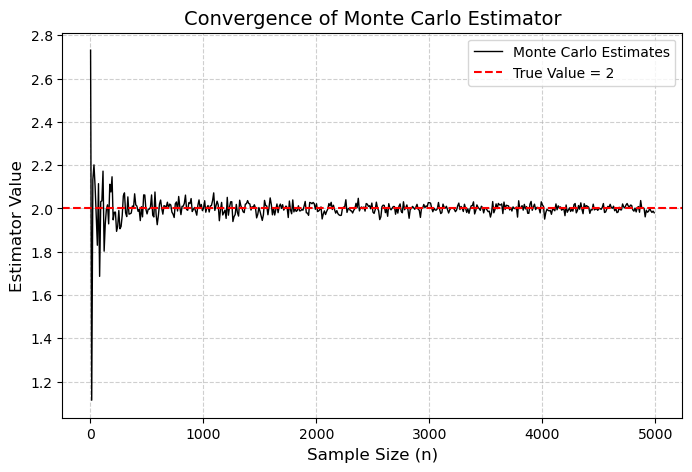

In [3]:
# true value of the integral
true_value = 2
n_values = np.arange(1, 5001, 10)
estimates = []

# compute the estimator for each n
for n in n_values:
    U = np.random.uniform(0, 1, n)
    Y = np.sin(np.pi * U)
    estimator = np.pi * np.mean(Y)
    estimates.append(estimator)

estimates = np.array(estimates)

# plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, estimates, label="Monte Carlo Estimates", color="black", linewidth=1)
plt.axhline(true_value, color="red", linestyle="--", label="True Value = 2")
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Estimator Value", fontsize=12)
plt.title("Convergence of Monte Carlo Estimator", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [4]:
# algorithm 2 - slide 10
n = 1000
U = np.random.uniform(0, 1, n)
V = np.random.uniform(0, 1, n)
Y = np.sqrt(U + V) * np.exp(U * V)
estimator = np.mean(Y)
print(estimator)

1.3281131992613482


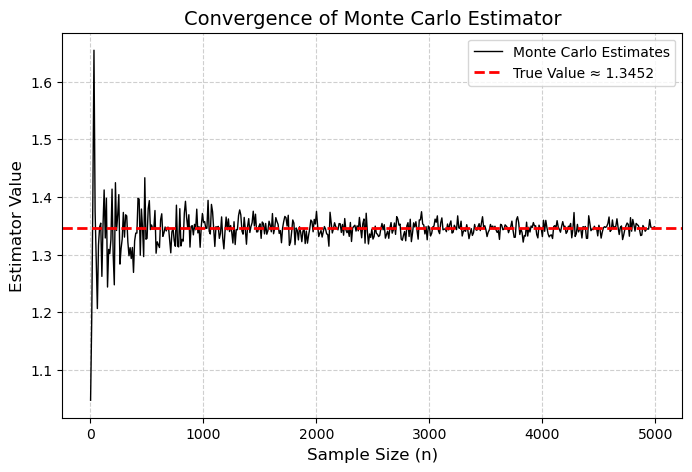

In [5]:
# true value (we'll approximate it using a very large n)
n_true = 2_000_000
U_true = np.random.uniform(0, 1, n_true)
V_true = np.random.uniform(0, 1, n_true)
Y_true = np.sqrt(U_true + V_true) * np.exp(U_true * V_true)
true_value = np.mean(Y_true)

# range of sample sizes
n_values = np.arange(1, 5001, 10)
estimates = []
std_errors = []

# compute the estimator for each n
for n in n_values:
    U = np.random.uniform(0, 1, n)
    V = np.random.uniform(0, 1, n)
    Y = np.sqrt(U + V) * np.exp(U * V)
    est = np.mean(Y)
    estimates.append(est)

estimates = np.array(estimates)

# plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, estimates, color="black", linewidth=1, label="Monte Carlo Estimates")
plt.axhline(true_value, color="red", linestyle="--", linewidth=2, label=f"True Value ≈ {true_value:.4f}")
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Estimator Value", fontsize=12)
plt.title("Convergence of Monte Carlo Estimator", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Part 3

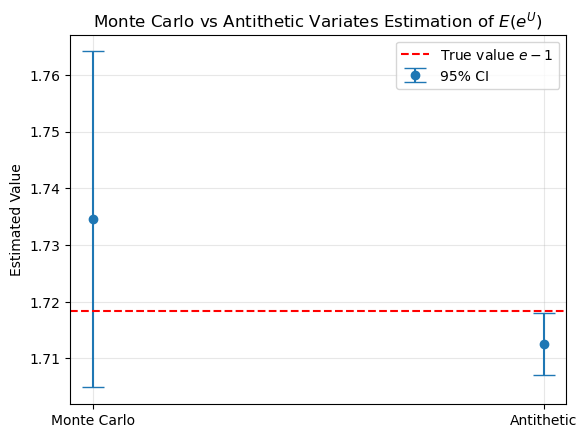

In [6]:
# MC vs. Antithetic
n = 1000
m = n // 2

# antithetic variates
ant_u = np.random.uniform(0, 1, m)
ant_g = (np.exp(ant_u) + np.exp(1 - ant_u)) / 2
ant_estimator = np.mean(ant_g)
ant_ci = (
    ant_estimator - 1.96 * np.std(ant_g, ddof=1) / np.sqrt(m),
    ant_estimator + 1.96 * np.std(ant_g, ddof=1) / np.sqrt(m)
)

# monte carlo
mc_u = np.random.uniform(0, 1, n)
mc_g = np.exp(mc_u)
mc_estimator = np.mean(mc_g)
mc_ci = (
    mc_estimator - 1.96 * np.std(mc_g, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(mc_g, ddof=1) / np.sqrt(n)
)

# plot
true_value = np.e - 1
methods = ['Monte Carlo', 'Antithetic']
estimates = [mc_estimator, ant_estimator]
errors = [mc_estimator - true_value, ant_estimator - true_value]
cis = [[mc_estimator - mc_ci[0], mc_ci[1] - mc_estimator],
    [ant_estimator - ant_ci[0], ant_ci[1] - ant_estimator]]

plt.errorbar(methods, estimates, yerr=np.array(cis).T, fmt='o', capsize=8, label="95% CI")
plt.axhline(true_value, color='red', linestyle='--', label=r"True value $e-1$")
plt.title("Monte Carlo vs Antithetic Variates Estimation of $E(e^U)$")
plt.ylabel("Estimated Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Part 4

In [7]:
# basic Monte Carlo estimator
n = 1000
U = np.random.uniform(0, 1, n)
G = np.exp(-U**4)
mc_estimator = np.mean(G)
mc_ci = (
    mc_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# importance sampling estimator
C = np.e / (np.e - 1)
U = np.random.uniform(0, 1, n)
Y = np.log(C / (C - U))  # inverse transform sampling
G1 = 1/C * np.exp(Y - Y**4)
is_estimator = np.mean(G1)

is_ci = (
    is_estimator - 1.96 * np.std(G1, ddof=1) / np.sqrt(n),
    is_estimator + 1.96 * np.std(G1, ddof=1) / np.sqrt(n)
)

# results
print(f"Basic Monte Carlo Estimate: {mc_estimator:.6f}")
print(f"95% CI: {mc_ci}")
print()
print(f"Importance Sampling Estimate: {is_estimator:.6f}")
print(f"95% CI: {is_ci}")

Basic Monte Carlo Estimate: 0.843946
95% CI: (np.float64(0.8321194539719158), np.float64(0.8557733453804849))

Importance Sampling Estimate: 0.842794
95% CI: (np.float64(0.8351684561810344), np.float64(0.8504193082173495))


### Part 5

In [8]:
# basic Monte Carlo estimator
n = 1000
U = np.random.uniform(0, 1, n)
G = np.log(2*U**2+1)
mc_estimator = np.mean(G)
mc_ci = (
    mc_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# Control Variates estimator
G1 = np.log(2*U**2+1) - U
cv_estimator = np.mean(G1) + 0.5
cv_ci = (
    cv_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    cv_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# results
print(f"Basic Monte Carlo Estimate: {mc_estimator:.6f}")
print(f"95% CI: {mc_ci}")
print()
print(f"Importance Sampling Estimate: {cv_estimator:.6f}")
print(f"95% CI: {cv_ci}")

Basic Monte Carlo Estimate: 0.448246
95% CI: (np.float64(0.4267010237224617), np.float64(0.46979181878889514))

Importance Sampling Estimate: 0.450959
95% CI: (np.float64(0.4294138761070273), np.float64(0.47250467117346073))
